In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [56]:
df=pd.read_csv("merged_output_v1.csv")

In [57]:
df

,unnamed:_0,population_growth,population_growth_rate,population,year,city,country,land_area_(sq._km),population_density_(no._per_sq._km),real_gdp
0,0,163737.0,0.023375,7168583.0,2035,Alexandria,Egypt,NaN,NaN,NaN
1,0,651072.0,0.023375,28504352.0,2035,Cairo,Egypt,NaN,NaN,NaN
2,1,156804.0,0.022898,7004846.0,2034,Alexandria,Egypt,NaN,NaN,NaN
3,1,623526.0,0.022899,27853280.0,2034,Cairo,Egypt,NaN,NaN,NaN
4,2,150073.0,0.022406,6848042.0,2033,Alexandria,Egypt,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2956,8532,NaN,NaN,NaN,2023,NaN,Zimbabwe,NaN,NaN,2.844
2957,8533,NaN,NaN,NaN,2024,NaN,Zimbabwe,NaN,NaN,2.892
2958,8534,NaN,NaN,NaN,2025,NaN,Zimbabwe,NaN,NaN,2.948
2959,8535,NaN,NaN,NaN,2026,NaN,Zimbabwe,NaN,NaN,2.958


In [58]:

df_new = df[df['city'] == 'Cairo']
 
print(df_new)

     unnamed:_0  population_growth  population_growth_rate  population  year  \
1             0           651072.0                0.023375  28504352.0  2035   
3             1           623526.0                0.022899  27853280.0  2034   
5             2           596806.0                0.022409  27229754.0  2033   
7             3           570172.0                0.021877  26632948.0  2032   
9             4           546080.0                0.021401  26062776.0  2031   
..          ...                ...                     ...         ...   ...   
163          81           111220.0                0.039688   2913563.0  1954   
165          82           106830.0                0.039633   2802343.0  1953   
167          83           103036.0                0.039744   2695513.0  1952   
169          84            98963.0                0.039688   2592477.0  1951   
171          85                0.0                0.000000   2493514.0  1950   

      city country  land_area_(sq._km) 

In [59]:
df_new.isnull().sum()

unnamed:_0                              0
population_growth                       0
population_growth_rate                  0
population                              0
year                                    0
city                                    0
country                                 0
land_area_(sq._km)                     86
population_density_(no._per_sq._km)    86
real_gdp                               38
dtype: int64

In [60]:
df1=df_new.drop(columns =['unnamed:_0','land_area_(sq._km)','population_density_(no._per_sq._km)','real_gdp'])

In [61]:

df2 = df1[df1['year'] <= 2023]

df2 = df2.reset_index()

In [62]:
df2

,index,population_growth,population_growth_rate,population,year,city,country
0,25,433180.0,0.019916,22183200.0,2023,Cairo,Egypt
1,27,427270.0,0.020038,21750020.0,2022,Cairo,Egypt
2,29,422146.0,0.020198,21322750.0,2021,Cairo,Egypt
3,31,415640.0,0.020290,20900604.0,2020,Cairo,Egypt
4,33,408962.0,0.020371,20484964.0,2019,Cairo,Egypt
...,...,...,...,...,...,...,...
69,163,111220.0,0.039688,2913563.0,1954,Cairo,Egypt
70,165,106830.0,0.039633,2802343.0,1953,Cairo,Egypt
71,167,103036.0,0.039744,2695513.0,1952,Cairo,Egypt
72,169,98963.0,0.039688,2592477.0,1951,Cairo,Egypt


In [63]:
df2 = df2.drop(columns=['index'])

<AxesSubplot:xlabel='year', ylabel='population'>

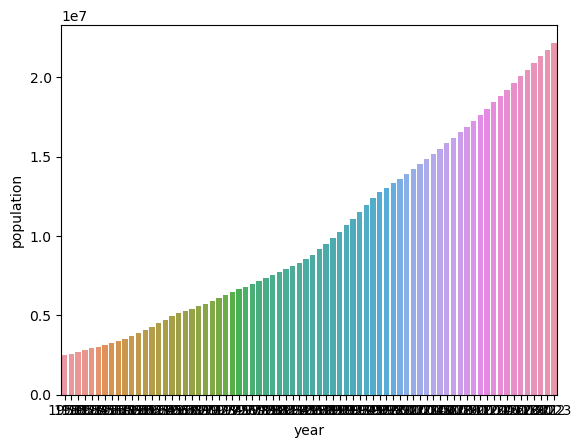

In [64]:
import seaborn as sns
sns.barplot(x="year",y="population",data=df2)

<AxesSubplot:xlabel='year', ylabel='population'>

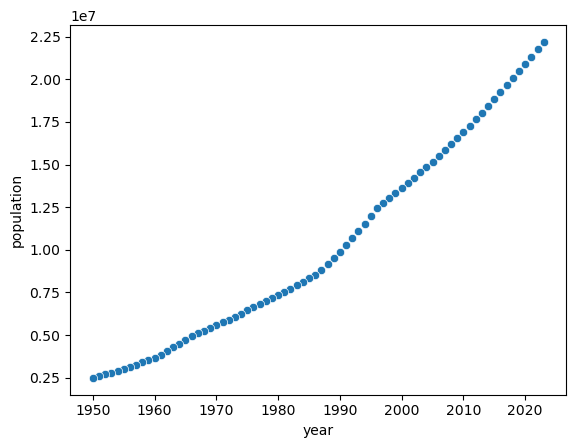

In [65]:
sns.scatterplot(data=df2,x="year",y="population")

array([[<AxesSubplot:title={'center':'population_growth'}>,
        <AxesSubplot:title={'center':'population_growth_rate'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

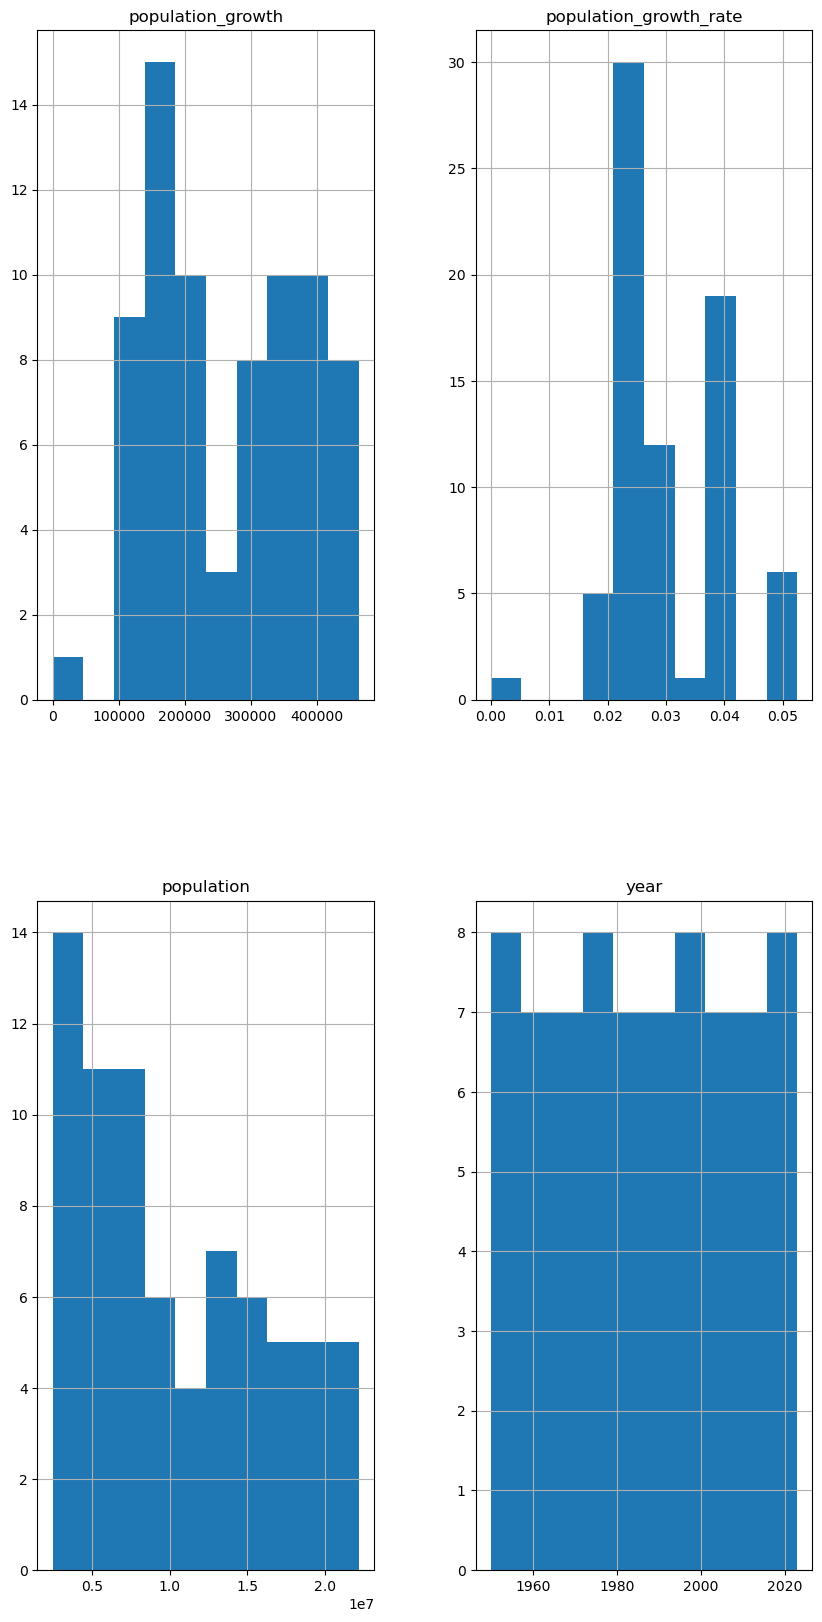

In [66]:
df2.hist(figsize=(10,20))

                        population_growth  population_growth_rate  population  \
population_growth                1.000000               -0.235778    0.874345   
population_growth_rate          -0.235778                1.000000   -0.604169   
population                       0.874345               -0.604169    1.000000   
year                             0.892953               -0.601924    0.985061   

                            year  
population_growth       0.892953  
population_growth_rate -0.601924  
population              0.985061  
year                    1.000000  


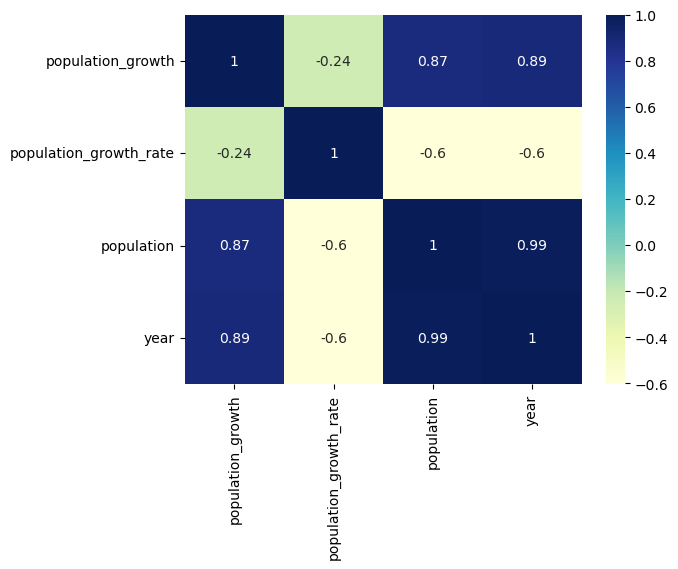

In [67]:
import seaborn as sb

# import modules
import matplotlib.pyplot as mp
print(df2.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [139]:
X = df2[['population_growth','population_growth_rate','year']]
y = df2['population']

In [140]:
X

,population_growth,population_growth_rate,year
0,433180.0,0.019916,2023
1,427270.0,0.020038,2022
2,422146.0,0.020198,2021
3,415640.0,0.020290,2020
4,408962.0,0.020371,2019
...,...,...,...
69,111220.0,0.039688,1954
70,106830.0,0.039633,1953
71,103036.0,0.039744,1952
72,98963.0,0.039688,1951


In [141]:
y

0     22183200.0
1     21750020.0
2     21322750.0
3     20900604.0
4     20484964.0
         ...    
69     2913563.0
70     2802343.0
71     2695513.0
72     2592477.0
73     2493514.0
Name: population, Length: 74, dtype: float64

In [142]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [143]:
model = LinearRegression()


In [144]:
model.fit(X_train,y_train)

LinearRegression()

In [145]:
y_pred_linear=model.predict(X_test)

In [146]:
model.predict(X_test)

array([18461778.17264795,  5637829.99785447,  9599520.7096622 ,
       11431374.86546874,  3880635.87683642, 16620117.1192975 ,
       13612440.69214189, 10170738.65003085, 15812640.34195411,
       12475392.2521292 , 11862648.55323398, 14169379.84702098,
       16352106.01371586, 19623815.85125005, 19353542.98448932,
       14445061.68258655,  1783894.0875057 , 19899491.5610429 ,
       12921976.37047291, -1571891.18346298, 15541240.87417018,
       13333014.59527361, 11210025.19060397])

In [147]:
test_predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
print(MAE)
MSE = mean_squared_error(y_test,test_predictions)
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

860081.5308280665
1613823464446.5842
1270363.5166544197


In [148]:
from sklearn.metrics import r2_score
er1=r2_score(y_test,y_pred_linear)
er1

0.9475233561823627

In [149]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  -629699683.2039813
Coefficients:


[('population_growth', -7.05407067943724),
 ('population_growth_rate', 64524923.489369325),
 ('year', 322116.81642077863)]

In [150]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_linear})
mlr_diff.head()

,Actual value,Predicted value
6,19648312.0,1.846178e+07
53,5584507.0,5.637830e+06
39,8122659.0,9.599521e+06
32,10275264.0,1.143137e+07
62,3862355.0,3.880636e+06


Random forest

In [151]:

regressor1 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [152]:
y_pred_random=regressor1.predict(X_test)

In [153]:
from sklearn.metrics import r2_score
er3=r2_score(y_test,y_pred_random)
er3

0.967911247089262

In [154]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_random)

986831066638.6893

In [155]:
df3= df1[df1['year'] >= 2023]

In [156]:
df3= df3.reset_index()
df3 = df3.drop(columns=['index'])


In [159]:
Xtest = df3[['population_growth','population_growth_rate','year']]
Xtest

,population_growth,population_growth_rate,year
0,651072.0,0.023375,2035
1,623526.0,0.022899,2034
2,596806.0,0.022409,2033
3,570172.0,0.021877,2032
4,546080.0,0.021401,2031
5,523188.0,0.020933,2030
6,502746.0,0.020528,2029
7,484948.0,0.020201,2028
8,471202.0,0.020022,2027
9,460388.0,0.019952,2026


In [160]:
y_pop=df3[['population','year']]
y_pop

,population,year
0,28504352.0,2035
1,27853280.0,2034
2,27229754.0,2033
3,26632948.0,2032
4,26062776.0,2031
5,25516696.0,2030
6,24993508.0,2029
7,24490762.0,2028
8,24005814.0,2027
9,23534612.0,2026


In [161]:
Y_test_linear=model.predict(Xtest)

In [162]:
Y_test_linear

array([22723604.07138538, 22565061.85144663, 22399803.49305642,
       22231257.60306656, 22048374.81984746, 21857546.38387227,
       21653498.15749013, 21435848.62421882, 21199107.54827499,
       20948809.61797464, 20694500.05716813, 20438009.03800941,
       20172052.0701263 ])

In [163]:
predicted = pd.DataFrame(Y_test_linear,columns=['predicted'])

In [164]:
df_linear_regression = pd.merge(y_pop,predicted,how = 'left',left_index = True, right_index = True)

In [165]:
df_linear_regression

,population,year,predicted
0,28504352.0,2035,2.272360e+07
1,27853280.0,2034,2.256506e+07
2,27229754.0,2033,2.239980e+07
3,26632948.0,2032,2.223126e+07
4,26062776.0,2031,2.204837e+07
5,25516696.0,2030,2.185755e+07
6,24993508.0,2029,2.165350e+07
7,24490762.0,2028,2.143585e+07
8,24005814.0,2027,2.119911e+07
9,23534612.0,2026,2.094881e+07


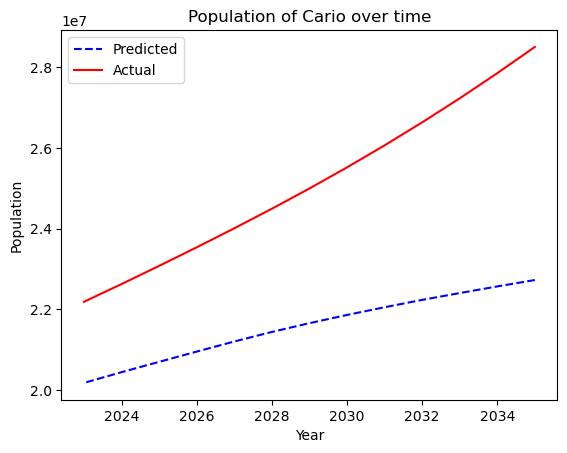

In [166]:
plt.plot(df_linear_regression['year'],predicted, color='blue',linestyle='dashed', label='Predicted')
plt.plot(df_linear_regression['year'],df_linear_regression['population'], color='red', label='Actual')
plt.title("Population of Cario over time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.show()

In [167]:
Y_test_random=regressor1.predict(Xtest)


In [168]:
predicted_random = pd.DataFrame(Y_test_random,columns=['predicted_random'])

In [169]:
predicted_random

,predicted_random
0,20749557.4
1,20749557.4
2,20749557.4
3,20749557.4
4,20749557.4
5,21252289.6
6,21463009.4
7,21463009.4
8,21972480.2
9,21972480.2


In [170]:
df_random_forest = pd.merge(y_pop,predicted_random,how = 'left',left_index = True, right_index = True)

In [171]:
df_random_forest

,population,year,predicted_random
0,28504352.0,2035,20749557.4
1,27853280.0,2034,20749557.4
2,27229754.0,2033,20749557.4
3,26632948.0,2032,20749557.4
4,26062776.0,2031,20749557.4
5,25516696.0,2030,21252289.6
6,24993508.0,2029,21463009.4
7,24490762.0,2028,21463009.4
8,24005814.0,2027,21972480.2
9,23534612.0,2026,21972480.2


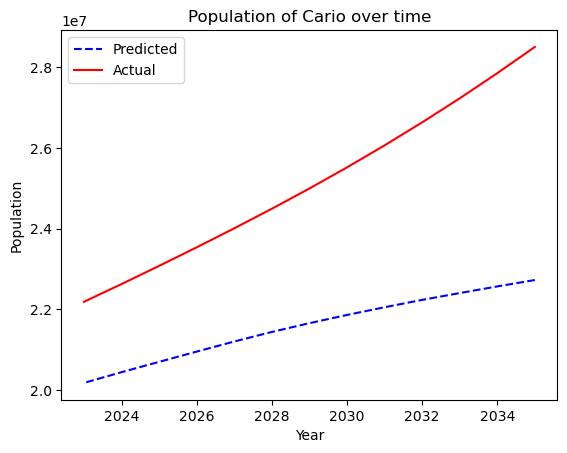

In [172]:
plt.plot(df_random_forest['year'],predicted, color='blue',linestyle='dashed', label='Predicted')
plt.plot(df_random_forest['year'],df_random_forest['population'], color='red', label='Actual')
plt.title("Population of Cario over time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.show()